# IMDB Movie Reviews

This notebook is focus on exploring and cleaning the data.

## 1. Understanding the Problem

## 2. Data Understanding

Structure of the data:

* **Features**:
  * **review**: text
* **Target variable**:
  * **sentiment**: positive / negative

Link: <https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews>

## 3. Data exploration

### 3.1. Review the state of the data

This is a first glance over the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
plt.style.use("ggplot")

In [3]:
pd.set_option("max_colwidth", 400)

In [11]:
PATH_DATA = os.path.join(os.getenv("PATH_DATA_PROJECTS"), "Tabular", "IMDB_movie_reviews")

In [12]:
df_train_full = pd.read_csv(os.path.join(PATH_DATA, "IMDB Dataset.csv"))
print("Shape:", df_train_full.shape)
df_train_full.head()

Shape: (50000, 2)


,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regard...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the ref...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof...",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Paren...",negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action t...",positive


In [13]:
df_train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [14]:
print("Total missing by columns:")
df_train_full.isnull().sum()

Total missing by columns:


review       0
sentiment    0
dtype: int64

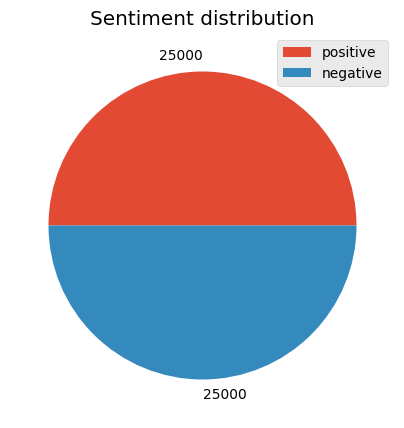

In [15]:
counts = df_train_full["sentiment"].value_counts()

fig = plt.figure(figsize = (5, 5))
plt.pie(counts, labels = counts)
plt.legend(counts.keys().tolist())
plt.title("Sentiment distribution")
plt.show()

### 3.2. Data cleaning

In [16]:
import nltk
nltk.download("stopwords")
nltk.download("omw-1.4")
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Wilder\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Wilder\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Wilder\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Wilder\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [17]:
from nltk.tokenize import word_tokenize
import re
import string

#### 3.2.1. Remove contractions

Remove contractions transforming them into long sentences. **For example**: I've created a sample ---> I have create a sample.

In [18]:
def remove_contractions(text):
    contractions_dict = {
        "I'm": "I am",
        "I'll": "I will",
        "I'd": "I would",
        "I've": "I have",
        "you're": "you are",
        "you'll": "you will",
        "you'd": "you would",
        "you've": "you have",
        "he's": "he is",
        "he'll": "he will",
        "he'd": "he would",
        "she's": "she is",
        "she'll": "she will",
        "she'd": "she would",
        "it's": "it is",
        "it'll": "it will",
        "it'd": "it would",
        "we're": "we are",
        "we'll": "we will",
        "we'd": "we would",
        "we've": "we have",
        "they're": "they are",
        "they'll": "they will",
        "they'd": "they would",
        "they've": "they have",
        "isn't": "is not",
        "aren't": "are not",
        "wasn't": "was not",
        "weren't": "were not",
        "haven't": "have not",
        "hasn't": "has not",
        "hadn't": "had not",
        "won't": "will not",
        "wouldn't": "would not",
        "don't": "do not",
        "doesn't": "does not",
        "didn't": "did not",
        "can't": "cannot",
        "couldn't": "could not",
        "shouldn't": "should not",
        "mightn't": "might not",
        "mustn't": "must not"
    }
    
    pattern = "(%s)" % "|".join(contractions_dict.keys())
    compiler = re.compile(pattern)
    
    def replace(match):
        return contractions_dict[match.group(0)]
    
    return compiler.sub(replace, text)

In [19]:
df_train_full["review"] = df_train_full["review"].map(remove_contractions)
df_train_full.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you will be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with rega...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the ref...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof...",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you are going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Pare...",negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action t...",positive


#### 3.2.2. Remove html tags

Remove all html tags that are usually found in texts extracted from Internet. For example: < p>mytext</ p> ---> mytext. The purpose of this step is to have uniformity in text and remove the possibility of having more dimensions due to html tags.

In [20]:
def remove_HTML_tags(text):
    pattern = re.compile("<.*?>")
    return re.sub(pattern, " ", text)

In [21]:
df_train_full["review"] = df_train_full["review"].map(remove_HTML_tags)
df_train_full.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you will be hooked. They are right, as this is exactly what happened with me. The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to dru...",positive
1,"A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams'...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof...",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time. This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie. OK, first of all when you are going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & ...",negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action to the pres...",positive


#### 3.2.3. Remove punctuations

Remove symbols like: "?,!" However, I am also adding more punctuations manually, because the string.punctuation does not remove all punctuations.

In [22]:
def remove_punctuations(text):
    # Add more punctuations
    additional_punctuations = "—–…“”‘’"
    
    # Combine all punctuations
    all_punctuations = string.punctuation + additional_punctuations
    
    # Remove punctuations
    text = text.translate(str.maketrans("", "", all_punctuations))
    
    return text

In [23]:
df_train_full["review"] = df_train_full["review"].map(remove_punctuations)
df_train_full.head()

,review,sentiment
0,One of the other reviewers has mentioned that after watching just 1 Oz episode you will be hooked They are right as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex ...,positive
1,A wonderful little production The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece The actors are extremely well chosen Michael Sheen not only has got all the polari but he has all the voices down pat too You can truly see the seamless editing guided by the references to Williams diary entri...,positive
2,I thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy The plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer While some may be disappointed when they realize this is not Match Point 2 Risk Addiction I thought it was proof that Woo...,positive
3,Basically theres a family where a little boy Jake thinks theres a zombie in his closet his parents are fighting all the time This movie is slower than a soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you are going to make a film you must Decide if its a thriller or a drama As a drama the movie is watchable Parents are divorcing arguing like in...,negative
4,Petter Matteis Love in the Time of Money is a visually stunning film to watch Mr Mattei offers us a vivid portrait about human relations This is a movie that seems to be telling us what money power and success do to people in the different situations we encounter This being a variation on the Arthur Schnitzlers play about the same theme the director transfers the action to the present time N...,positive


#### 3.2.4. Make words lowercase

Convert words to lowercase, in order to have uniformity in text. For example: the word "TOKENIZATION" and "tokenization" is the same.

In [24]:
def make_lowercase(text):
    text = text.lower()
    return text

In [25]:
df_train_full["review"] = df_train_full["review"].map(make_lowercase)
df_train_full.head()

,review,sentiment
0,one of the other reviewers has mentioned that after watching just 1 oz episode you will be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex ...,positive
1,a wonderful little production the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entri...,positive
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point 2 risk addiction i thought it was proof that woo...,positive
3,basically theres a family where a little boy jake thinks theres a zombie in his closet his parents are fighting all the time this movie is slower than a soap opera and suddenly jake decides to become rambo and kill the zombie ok first of all when you are going to make a film you must decide if its a thriller or a drama as a drama the movie is watchable parents are divorcing arguing like in...,negative
4,petter matteis love in the time of money is a visually stunning film to watch mr mattei offers us a vivid portrait about human relations this is a movie that seems to be telling us what money power and success do to people in the different situations we encounter this being a variation on the arthur schnitzlers play about the same theme the director transfers the action to the present time n...,positive


#### 3.2.5. Remove numbers

Remove numbers, because for the purpose of this project they do not add any information. Keeping numbers will only add more dimensions to my training data.

In [26]:
def remove_numbers(text):
    # Create pattern for Numbers + "S"
    pattern = r"\d+s"
    
    # Remove numbers 1
    text = re.sub(pattern, "", text)
    
    # Create pattern for only numbers
    pattern = r"\d+"
    
    # Remove numbers 2
    text = re.sub(pattern, "", text)
    return text

In [27]:
df_train_full["review"] = df_train_full["review"].map(remove_numbers)
df_train_full.head()

,review,sentiment
0,one of the other reviewers has mentioned that after watching just oz episode you will be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex o...,positive
1,a wonderful little production the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entri...,positive
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point risk addiction i thought it was proof that wood...,positive
3,basically theres a family where a little boy jake thinks theres a zombie in his closet his parents are fighting all the time this movie is slower than a soap opera and suddenly jake decides to become rambo and kill the zombie ok first of all when you are going to make a film you must decide if its a thriller or a drama as a drama the movie is watchable parents are divorcing arguing like in...,negative
4,petter matteis love in the time of money is a visually stunning film to watch mr mattei offers us a vivid portrait about human relations this is a movie that seems to be telling us what money power and success do to people in the different situations we encounter this being a variation on the arthur schnitzlers play about the same theme the director transfers the action to the present time n...,positive


#### 3.2.6. Remove stopwords

Remove stopwords (an, the, ...), because they do not add information. Additionally, to remove stopwords it is necessary to apply tokenation, for that reason, I am using word_tokenize function.

In [28]:
from nltk.corpus import stopwords

In [29]:
def remove_stop_words(text):
    # Create tokens from words
    words = word_tokenize(text)
    
    # Get stopwords dataset
    stopWords = set(stopwords.words("english"))
    
    # Filter stopwords and recreate text without them
    text = " ".join([w for w in words if w not in stopWords])
    
    return text

In [30]:
df_train_full["review"] = df_train_full["review"].map(remove_stop_words)
df_train_full.head()

,review,sentiment
0,one reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts...,positive
1,wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great masters comedy life realism reall...,positive
2,thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point risk addiction thought proof woody allen still fully control style many us grown love would laughed one woodys comedies years dare say decade never impresse...,positive
3,basically theres family little boy jake thinks theres zombie closet parents fighting time movie slower soap opera suddenly jake decides become rambo kill zombie ok first going make film must decide thriller drama drama movie watchable parents divorcing arguing like real life jake closet totally ruins film expected see boogeyman similar movie instead watched drama meaningless thriller spots wel...,negative
4,petter matteis love time money visually stunning film watch mr mattei offers us vivid portrait human relations movie seems telling us money power success people different situations encounter variation arthur schnitzlers play theme director transfers action present time new york different characters meet connect one connected one way another next person one seems know previous point contact st...,positive


#### 3.2.7. Stemming

In [31]:
from nltk.stem import PorterStemmer

In [32]:
def get_stemms(text):
    # Create tokens from text
    words = word_tokenize(text)
    
    # Instance stemmer
    ps = PorterStemmer()
    
    # Apply stemming and recreate text
    text = " ".join([ps.stem(w) for w in words])
    return text

In [33]:
df_train_full["review"] = df_train_full["review"].map(get_stemms)
df_train_full.head()

,review,sentiment
0,one review mention watch oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi h...,positive
1,wonder littl product film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dr...,positive
2,thought wonder way spend time hot summer weekend sit air condit theater watch lightheart comedi plot simplist dialogu witti charact likabl even well bread suspect serial killer may disappoint realiz match point risk addict thought proof woodi allen still fulli control style mani us grown love would laugh one woodi comedi year dare say decad never impress scarlet johanson manag tone sexi imag j...,positive
3,basic there famili littl boy jake think there zombi closet parent fight time movi slower soap opera suddenli jake decid becom rambo kill zombi ok first go make film must decid thriller drama drama movi watchabl parent divorc argu like real life jake closet total ruin film expect see boogeyman similar movi instead watch drama meaningless thriller spot well play parent descent dialog shot jake i...,negative
4,petter mattei love time money visual stun film watch mr mattei offer us vivid portrait human relat movi seem tell us money power success peopl differ situat encount variat arthur schnitzler play theme director transfer action present time new york differ charact meet connect one connect one way anoth next person one seem know previou point contact stylishli film sophist luxuri look taken see p...,positive


#### 3.2.8. Lemmatization

In [34]:
from nltk.stem import WordNetLemmatizer

In [35]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Wilder\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
def get_lemmas(text):
    # Create tokens from text
    words = word_tokenize(text)
    
    # Instance lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Apply lemmatization and recreate text
    text = " ".join([lemmatizer.lemmatize(w) for w in words])
    
    return text

In [37]:
df_train_full["review"] = df_train_full["review"].map(get_lemmas)
df_train_full.head()

,review,sentiment
0,one review mention watch oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi h...,positive
1,wonder littl product film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sen realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dre...,positive
2,thought wonder way spend time hot summer weekend sit air condit theater watch lightheart comedi plot simplist dialogu witti charact likabl even well bread suspect serial killer may disappoint realiz match point risk addict thought proof woodi allen still fulli control style mani u grown love would laugh one woodi comedi year dare say decad never impress scarlet johanson manag tone sexi imag ju...,positive
3,basic there famili littl boy jake think there zombi closet parent fight time movi slower soap opera suddenli jake decid becom rambo kill zombi ok first go make film must decid thriller drama drama movi watchabl parent divorc argu like real life jake closet total ruin film expect see boogeyman similar movi instead watch drama meaningless thriller spot well play parent descent dialog shot jake i...,negative
4,petter mattei love time money visual stun film watch mr mattei offer u vivid portrait human relat movi seem tell u money power success peopl differ situat encount variat arthur schnitzler play theme director transfer action present time new york differ charact meet connect one connect one way anoth next person one seem know previou point contact stylishli film sophist luxuri look taken see peo...,positive


### 3.3. Conclusion

### 3.4. Save file

In [38]:
path_csv_clean = "IMDB_Dataset_cleaned.csv"
df_train_full.to_csv(os.path.join(PATH_DATA, path_csv_clean), index = False)